In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import steerable


(36, 256, 256)


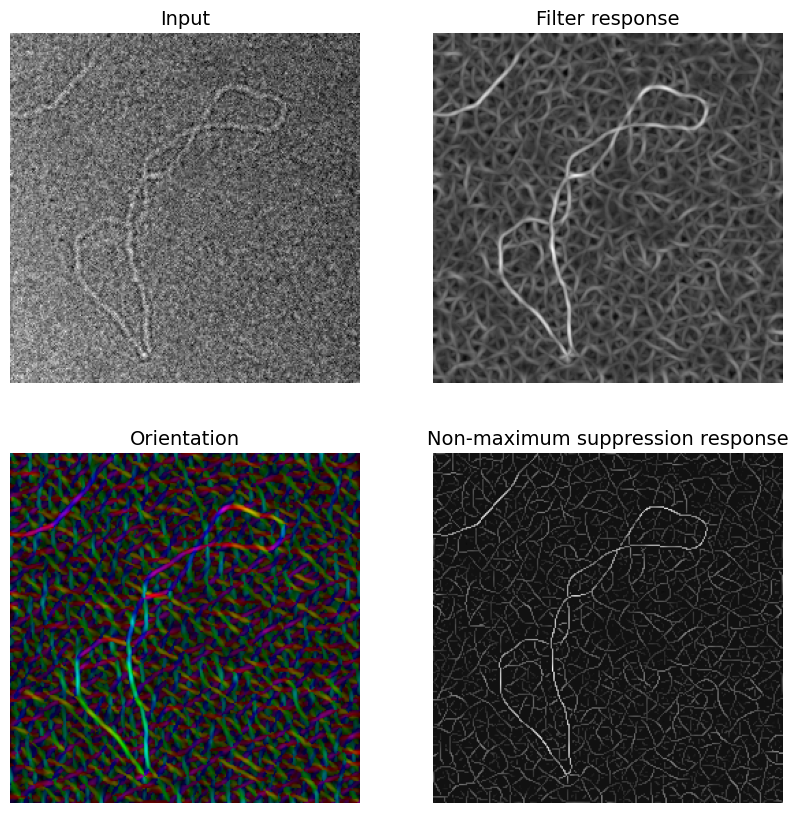

In [4]:
# load test image
img = plt.imread('../testdata/dna.tif').astype(np.float64)

# 4th order ridge detector
M = 4
sigma = 2.5
sd = steerable.Detector2D(img, M, sigma)
response, orientation = sd.filter()
nms = sd.get_nms()
composite = sd.make_composite(response, orientation)
test = sd.get_angle_response()
print(test.shape)

# plot
fig = plt.figure(figsize=(10,10))
args = {'fontsize': 14}
ax = fig.add_subplot(221)
ax.imshow(img, cmap=cm.gray) 
ax.set_title('Input', **args) 
ax.axis('off')
ax = fig.add_subplot(222)
ax.imshow(response, cmap=cm.gray) 
ax.set_title('Filter response', **args) 
ax.axis('off')
ax = fig.add_subplot(223)
ax.imshow(composite) 
ax.set_title('Orientation', **args) 
ax.axis('off')
ax = fig.add_subplot(224)
ax.imshow(nms, cmap=cm.gray) 
ax.set_title('Non-maximum suppression response', **args) 
ax.axis('off')
plt.show()
